<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/VAE/mol2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/samoturk/mol2vec/tree/master/examples

https://github.com/samoturk/mol2vec_notebooks

https://github.com/samsledje/ConPLex_dev/blob/main/requirements.txt

https://pubs.acs.org/doi/10.1021/acs.jcim.7b00616 mol2vec paper


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/A_JAK_design

/content/gdrive/MyDrive/A_JAK_design


In [ ]:
# !cat /proc/cpuinfo
import help_function.package_setup
!pip install pysmiles --quiet
!pip install gensim --quiet
!pip install -qq selfies==2.1.1 SciencePlots xgboost==1.6.1 --quiet
!pip uninstall dgl -y # dgl cuda version for training using gpu
!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html --quiet
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
!pip install git+https://github.com/samoturk/mol2vec --quiet
!pip install biopython --quiet
!pip install omegaconf --quiet

100%|██████████| 10/10 [00:57<00:00,  5.77s/it]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip uninstall gensim -y
# !pip install gensim==3.8.0 --quiet
# import gensim
# !pip install gensim

from gensim.models import word2vec
from help_function.package_version_check import *
from help_function.function import *
!python --version

torch version:  2.0.1+cu118
cuda available:  True
rdkit version:  2022.09.5
matplotlib version:  3.7.1
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


dgl version:  1.1.1+cu118
dgllife version:  0.3.2
molvs version:  0.1.1
gensim version:  4.3.1
Python 3.10.6


In [ ]:
# !git clone https://github.com/samoturk/mol2vec.git

Cloning into 'mol2vec'...
remote: Enumerating objects: 103, done.
remote: Total 103 (delta 0), reused 0 (delta 0), pack-reused 103
Receiving objects: 100% (103/103), 88.67 MiB | 16.36 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (26/26), done.


In [ ]:
if torch.cuda.is_available(): device = 'cuda'
else: device = 'cpu'
# device

In [ ]:
cd mol2vec

/content/gdrive/MyDrive/A_JAK_design/mol2vec


In [ ]:
create_path('test/')

test/  folder is in directory:  False
test/  is created!


In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

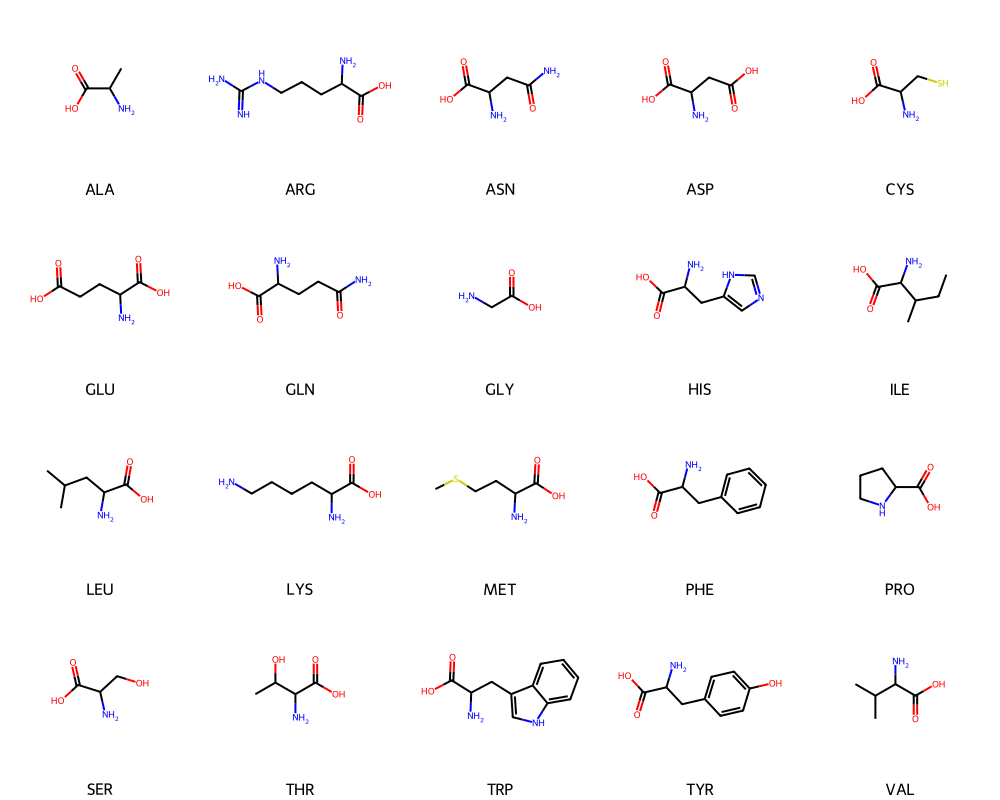

In [ ]:
aa_smis = ['CC(N)C(=O)O', 'N=C(N)NCCCC(N)C(=O)O', 'NC(=O)CC(N)C(=O)O',
           'NC(CC(=O)O)C(=O)O', 'NC(CS)C(=O)O', 'NC(CCC(=O)O)C(=O)O',
           'NC(=O)CCC(N)C(=O)O', 'NCC(=O)O','NC(Cc1cnc[nH]1)C(=O)O',
           'CCC(C)C(N)C(=O)O', 'CC(C)CC(N)C(=O)O', 'NCCCCC(N)C(=O)O',
           'CSCCC(N)C(=O)O', 'NC(Cc1ccccc1)C(=O)O', 'O=C(O)C1CCCN1',
           'NC(CO)C(=O)O', 'CC(O)C(N)C(=O)O', 'NC(Cc1c[nH]c2ccccc12)C(=O)O',
           'NC(Cc1ccc(O)cc1)C(=O)O', 'CC(C)C(N)C(=O)O']

aa_codes = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS',
            'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP',
            'TYR', 'VAL']

aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [ ]:
sentence = mol2alt_sentence(aas[0], 1)
sentence

['2246728737',
 '3537119515',
 '2245273601',
 '2655406212',
 '847957139',
 '2599973650',
 '2246699815',
 '3855312692',
 '864942730',
 '1510328189',
 '864662311',
 '1533864325']

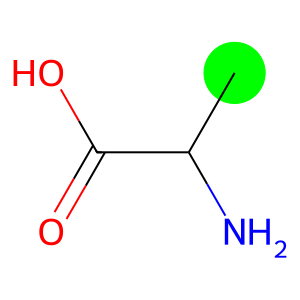

In [ ]:
depict_identifier(aas[0], 2246728737, 1)

In [ ]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it

In [ ]:
cd /content/gdrive/MyDrive/A_JAK_design/mol2vec/examples/

/content/gdrive/MyDrive/A_JAK_design/mol2vec/examples


In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('models/model_300dim.pkl')

In [ ]:
# model.wv.get_vector('2246728737')
vocab_len = len(model.wv)
vocab_len

21003

In [ ]:
model.wv.get_vector('2246728737')

array([-0.13674529,  0.06729241, -0.05213054, -0.00750703,  0.28921816,
       -0.13024387, -0.18778022, -0.08180202,  0.17663261, -0.23623651,
        0.15215029,  0.03104335,  0.22715245, -0.00406356,  0.0321878 ,
       -0.14886402,  0.35155123,  0.05230371,  0.25634497,  0.14891872,
       -0.0038601 ,  0.16931136,  0.31372482,  0.01881147, -0.19952172,
        0.03404459, -0.04627627, -0.21893106,  0.12341108,  0.05439068,
        0.05448844, -0.04903906, -0.31361288, -0.33548406, -0.04213666,
       -0.14339392, -0.0289033 , -0.0923715 ,  0.18249372,  0.1544386 ,
       -0.09051799,  0.07533539, -0.01364344, -0.17796858, -0.06144299,
       -0.00402305, -0.10959177,  0.09328562, -0.08955006,  0.15117231,
        0.12398589, -0.20872705,  0.3017063 , -0.16636986, -0.26913744,
       -0.12916061, -0.15348934,  0.11056198, -0.02592117, -0.06371941,
       -0.19357003,  0.00200986, -0.05617516,  0.0011254 , -0.5563765 ,
        0.04836231, -0.00086217,  0.08364478, -0.30566263,  0.05

In [ ]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)
df_vec = pd.DataFrame()
df_vec['identifier'] = list(aa_identifiers_unique)
df_vec.index = df_vec['identifier']

In [ ]:
len(df_vec)

75

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca_model = PCA(n_components=30)
tsne_model = TSNE(n_components=2, perplexity=10, n_iter=1000, metric = 'cosine')
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform([
    model.wv.word_vec(x) for x in aa_identifiers_unique]))

In [ ]:
df_vec['PCA-t-SNE-c1'] = tsne_pca.T[0]
df_vec['PCA-t-SNE-c2'] = tsne_pca.T[1]
df_vec.head(3)

,identifier,PCA-t-SNE-c1,PCA-t-SNE-c2
identifier,,,
3537119515,3537119515,-10.600789,-11.434173
2245384272,2245384272,-2.457360,-10.915522
849275503,849275503,-11.357737,19.043087


In [ ]:
projections = df_vec.to_dict()
def get_values(identifier, projections):
    return np.array((projections['PCA-t-SNE-c1'][str(identifier)],
                     projections['PCA-t-SNE-c2'][str(identifier)]))

get_values(2246728737, projections)

array([ -6.10469913, -13.68888187])

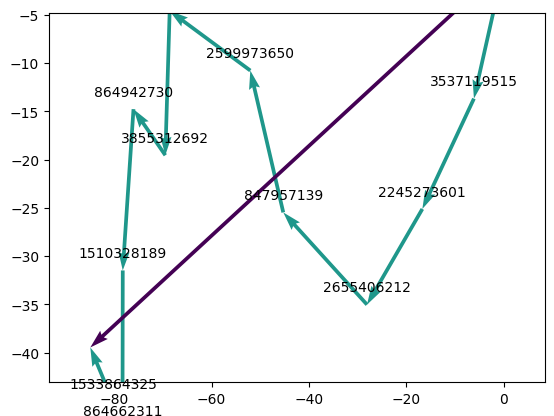

In [ ]:
aa_values = [get_values(x, projections) for x in aa_sentences[0]]
plot_2D_vectors(aa_values, vector_labels=aa_sentences[0] + ['ALA'],
                );

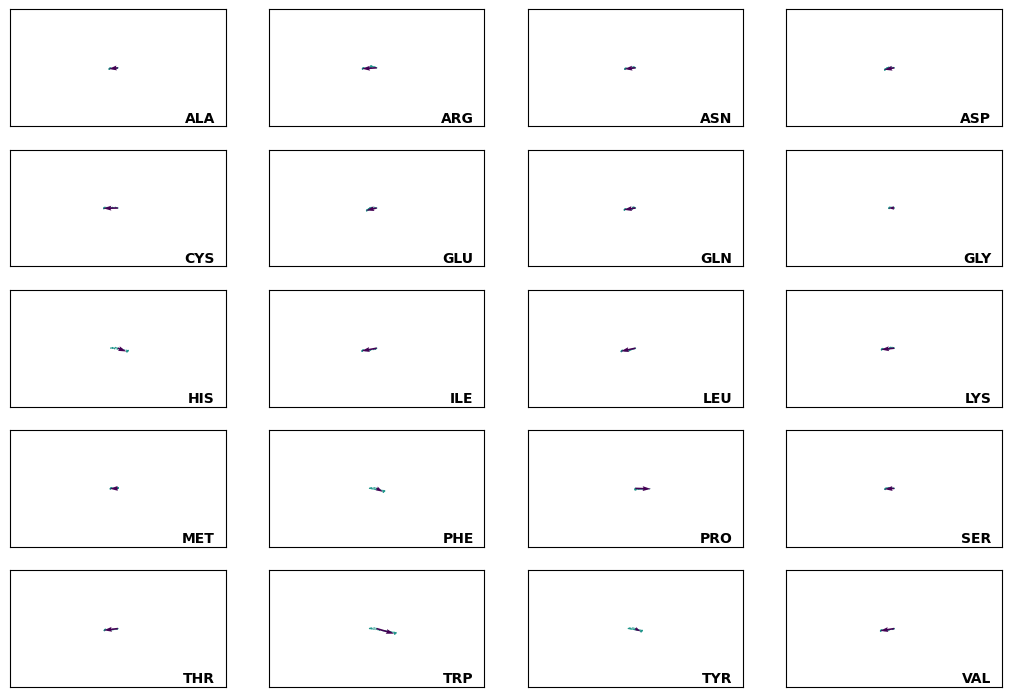

In [ ]:
f, ((ALA, ARG, ASN, ASP), (CYS, GLU, GLN, GLY), (HIS, ILE, LEU, LYS), (MET, PHE, PRO, SER), (THR, TRP, TYR, VAL)) = plt.subplots(5,4,
                                                    squeeze=True, sharex=True, sharey=True,
                                                    figsize=(6.4*2,  4.4*2))

for aa,name,ax in zip(aas, aa_codes, (ALA, ARG, ASN, ASP, CYS, GLU, GLN, GLY, HIS, ILE, LEU, LYS, MET, PHE, PRO, SER, THR, TRP, TYR, VAL)):
    pca_subs = [get_values(x, projections) for x in mol2alt_sentence(aa, 1)]
    plot_2D_vectors(pca_subs, ax=ax, min_max_x=(-1000,1000), min_max_y=(-2000, 2000))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.95, 0.01, u"%s" % name,
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, weight='bold',
            fontsize=10)

In [ ]:
df = PandasTools.LoadSDF('data/ames.sdf')
df.head(1)

,class,ID,ROMol
0,0,2475-33-4,<rdkit.Chem.rdchem.Mol object at 0x7abdf00d8040>


In [ ]:
len(df)

6506

In [ ]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
df['sentence'] = df.apply(lambda x: MolSentence(mol2alt_sentence(x['ROMol'], 1)), axis=1)


In [ ]:
def sentences2vec(sentences, model, unseen=None):
    """Generate vectors for each sentence (list) in a list of sentences. Vector is simply a
    sum of vectors for individual words.

    Parameters
    ----------
    sentences : list, array
        List with sentences
    model : word2vec.Word2Vec
        Gensim word2vec model
    unseen : None, str
        Keyword for unseen words. If None, those words are skipped.
        https://stats.stackexchange.com/questions/163005/how-to-set-the-dictionary-for-text-analysis-using-neural-networks/163032#163032

    Returns
    -------
    np.array
    """
    try:

        keys = set(model.wv.vocab.keys())
    except:
        keys = set(model.wv.key_to_index.keys())
    vec = []
    if unseen:
        try:
            unseen_vec = model.wv.word_vec(unseen)
        except:
            unseen_vec = model.wv.get_vector(unseen)
    for sentence in sentences:
        if unseen:
            vec.append(sum([model.wv.get_vector(y) if y in set(sentence) & keys
                       else unseen_vec for y in sentence]))
        else:
            vec.append(sum([model.wv.get_vector(y) for y in sentence
                            if y in set(sentence) & keys]))
    return np.array(vec)
# sentences2vec(df['sentence'], model, unseen='UNK')

In [ ]:
df['mol2vec'] = [DfVec(x) for x in sentences2vec(df['sentence'], model, unseen='UNK')]

In [ ]:
X = np.array([x.vec for x in df['mol2vec']])
y = np.array(df['class'].astype(int))

In [ ]:
X.shape

(6506, 300)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from tqdm import tqdm
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
y_values = []
predictions = []
probas = []
for train, test in tqdm(kf.split(X, y)):
    clf = RandomForestClassifier(n_estimators=500, random_state=0)
    clf.fit(X[train], y[train])
    predictions.append(clf.predict(X[test]))
    probas.append(clf.predict_proba(X[test]).T[1]) # Probabilities for class 1
    y_values.append(y[test])
    del clf

4it [02:25, 36.50s/it]


In [ ]:
aucs = [roc_auc_score(y, proba) for y, proba in zip(y_values, probas)]
np.mean(aucs), np.std(aucs)

(0.8686917091204087, 0.004411664917973581)

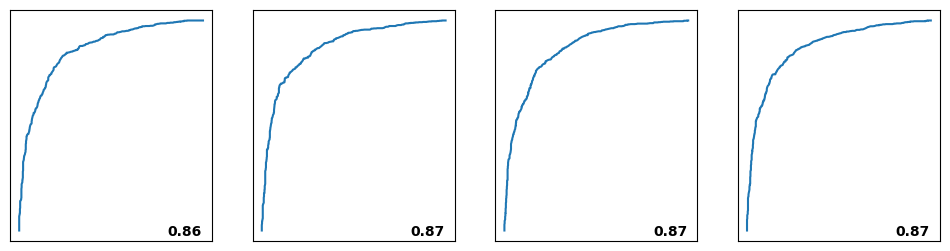

In [ ]:
f, ((p1, p2, p3, p4)) = plt.subplots(1,4, squeeze=True, sharex=True,
                                     sharey=True, figsize=(12,3))

for y,proba,ax in zip(y_values, probas, (p1,p2,p3,p4)):
    tpr, fpr, _ = roc_curve(y, proba)
    auc = roc_auc_score(y, proba)
    ax.plot(tpr, fpr)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.95, 0.01, u"%0.2f" % auc,
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, weight='bold', fontsize=10)
plt.show()

In [ ]:
import pickle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from IPython.display import SVG

In [ ]:
# !git clone https://github.com/samoturk/mol2vec_notebooks.git

In [ ]:
cd /content/gdrive/MyDrive/A_JAK_design/mol2vec/examples/mol2vec_notebooks/Notebooks

/content/gdrive/MyDrive/A_JAK_design/mol2vec/examples/mol2vec_notebooks/Notebooks


In [ ]:
with open('depictions.pkl', 'rb') as f:
    identifier_depictions = pickle.load(f)

In [ ]:
model = Word2Vec.load('model_300dim.pkl')
model.wv['3315826729']

array([ 0.05920351,  0.04540923, -0.0984517 ,  0.08198658,  0.01767361,
       -0.44732982, -0.6322294 ,  0.2725765 , -0.5938064 , -0.29551634,
       -0.04468651,  0.01800465, -0.03330593,  0.01149984, -0.02082377,
       -0.1644032 , -0.12564853, -0.30088434,  0.17487787, -0.2513254 ,
        0.01743176,  0.5653546 , -0.08646958,  0.33263516, -0.07011971,
       -0.5787332 , -0.44554466, -0.05275482, -0.16231972, -0.2805905 ,
        0.31790248,  0.29869255,  0.36739072, -0.21576877, -0.17456014,
       -0.64243513,  0.24821068,  0.18224494, -0.4516568 ,  0.03386842,
       -0.21662444, -0.24381138,  0.38993394,  0.6072493 , -0.26597854,
       -0.11135259, -0.6984357 ,  0.23751897,  0.37667257, -0.1565622 ,
        0.48533273,  0.4077411 ,  0.31866214,  0.1043139 ,  0.07350294,
       -0.19894293,  0.24359755,  0.10176945, -0.0445652 , -0.25336495,
       -0.4778037 , -0.32255203, -0.0556614 , -0.23559287, -0.1424404 ,
        0.06446814,  0.0324663 ,  0.37640765,  0.13690323, -0.10

In [ ]:
type(identifier_depictions['3315826729'][1])

identifier_depictions['3315826729']


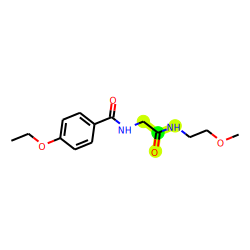

In [ ]:
SVG(identifier_depictions['3315826729'][1])

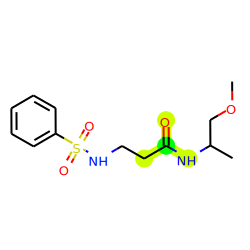

In [ ]:
SVG(identifier_depictions['3315826729'][2])

In [ ]:
identifiers = list(identifier_depictions)
X = [model.wv[x] for x in identifier_depictions]
X = pd.DataFrame(X)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1000,
                  metric='cosine')
tsne_pca = tsne_model.fit_transform(X)

In [ ]:
# tsne_pca

In [ ]:
model.wv['3218693969']

array([-0.02226072,  0.07868   , -0.15682957, -0.08972254, -0.11614504,
       -0.07530644, -0.17005888, -0.1568383 , -0.20442125, -0.20999236,
        0.41227284, -0.18000683,  0.10309563, -0.17482287, -0.17442577,
       -0.03076901,  0.0129966 ,  0.21962082, -0.06703798, -0.2036498 ,
       -0.22288758,  0.12291751, -0.36756524,  0.08537587, -0.06285772,
       -0.11867422, -0.03628948, -0.10303821, -0.06357767,  0.13697977,
       -0.08934904,  0.342945  ,  0.332461  ,  0.06785779, -0.15964924,
       -0.38135523,  0.14866947,  0.23439986, -0.14162059,  0.23595098,
        0.2990602 , -0.29279593,  0.09789294, -0.10643703, -0.10583882,
       -0.29601946, -0.25110248, -0.02168008,  0.299864  ,  0.2473128 ,
        0.04997937,  0.15441966, -0.13283202, -0.0620005 ,  0.13801199,
        0.2645741 , -0.0703153 , -0.15580878,  0.24161758,  0.07265868,
       -0.04422111, -0.03723367,  0.26023552,  0.12811612,  0.22936153,
       -0.1553407 , -0.15601517,  0.4644556 , -0.09364346,  0.41

In [ ]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()
source = ColumnDataSource(data=dict(x=tsne_pca[:,0], y=tsne_pca[:,1],
                                    desc=identifiers,
                    svgs=[identifier_depictions[x][1] for x in identifiers]))

hover = HoverTool(tooltips="""
    <div>
        <div>@svgs{safe}
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
    </div>
    """
)
p = figure(plot_width=700, plot_height=700,
           tools=['reset,box_zoom,wheel_zoom,zoom_in,zoom_out,pan', hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=10, source=source, fill_alpha=0.2,);
show(p)

In [ ]:
type()

str

In [ ]:
svgs[0]

'<svg baseProfile="full" height="250px" version="1.1" width="250px" xml:space="preserve" xmlns:rdkit="http://www.rdkit.org/xml" xmlns:svg="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<rect height="250" style="opacity:1.0;fill:#FFFFFF;stroke:none" width="250" x="0" y="0"> </rect>\n<ellipse cx="50.5384" cy="103.168" rx="8.86065" ry="8.86065" style="fill:#00FF00;fill-rule:evenodd;stroke:#00FF00;stroke-width:1px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<ellipse cx="51.8998" cy="149.19" rx="8.86065" ry="8.86065" style="fill:#00FF00;fill-rule:evenodd;stroke:#00FF00;stroke-width:1px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 11.3636,127.358 37.934,126.572" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"/>\n<path d="M 37.934,126.572 50.5384,103.168" style="fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;

In [ ]:
svgs=[identifier_depictions[x][1] for x in identifiers]

In [ ]:
cd /content/gdrive/MyDrive/A_JAK_design

/content/gdrive/MyDrive/A_JAK_design


In [ ]:
ls

ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
device_new = torch.device(device)
device_new

device(type='cuda')

In [ ]:
# from omegaconf import OmegaConf
# conf = OmegaConf.create()
# print(OmegaConf.to_yaml(conf))
# conf = OmegaConf.create({"k" : "v", "list" : [1, {"a": "1", "b": "2", 3: "c"}]})
# print(OmegaConf.to_yaml(conf))

{}

k: v
list:
- 1
- a: '1'
  b: '2'
  3: c

